<a href="https://colab.research.google.com/github/NamPham1010/Data_Science_Exercise/blob/main/ML_Project_3_Clinical_Record.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.shape

(299, 13)

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

**Data Cleaning**


In [ ]:
# Checking for null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# Checking for duplicated value
df.duplicated().sum()

0

**EDA**

In [ ]:
# Creating a variable to see how features correlates to each other
corr_matrix = df.corr()

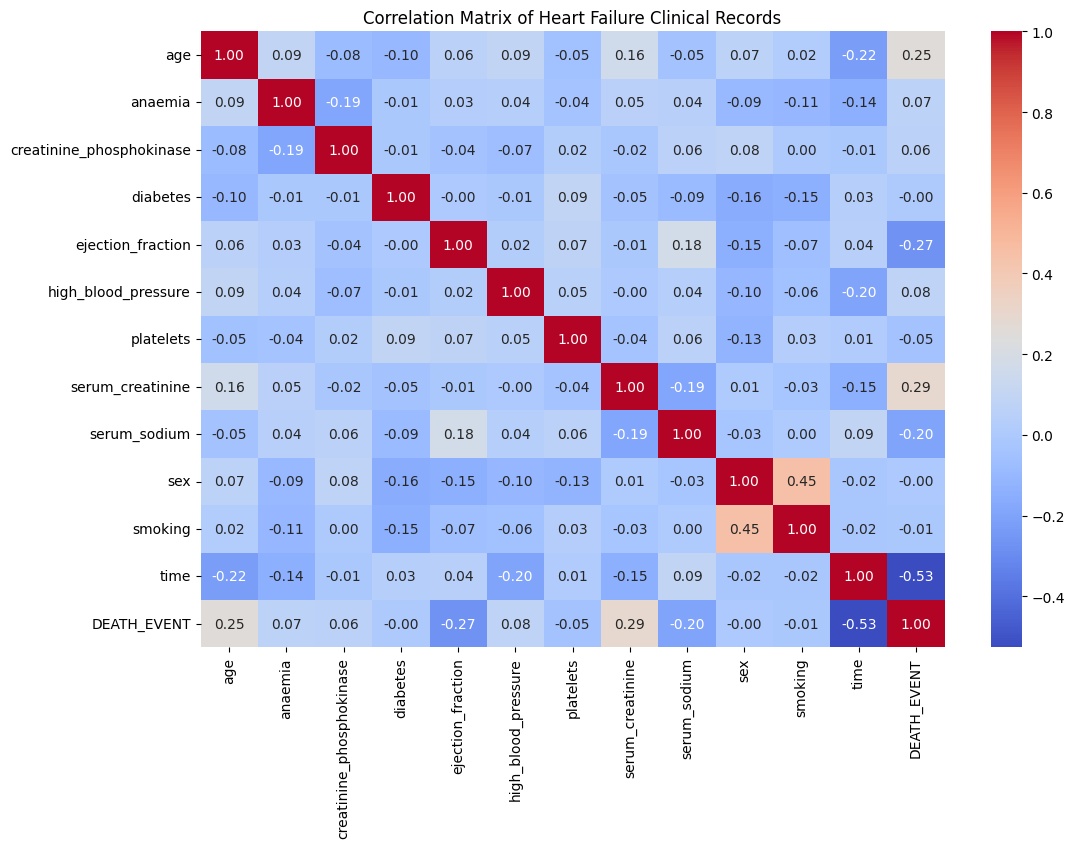

In [ ]:
# Visualizing the correlation
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Heart Failure Clinical Records")
plt.show()

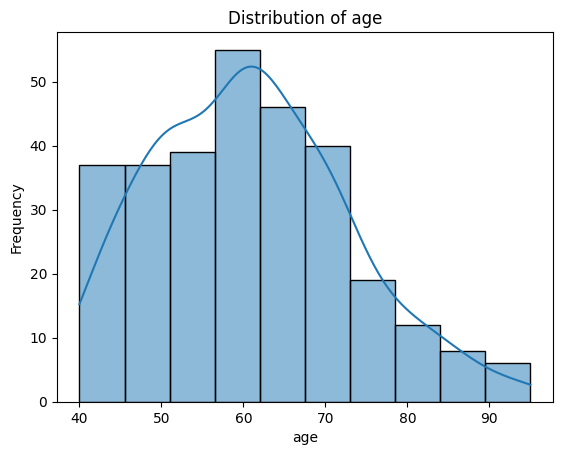

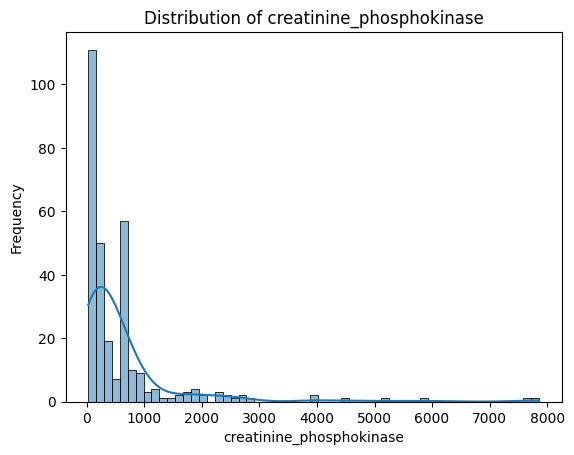

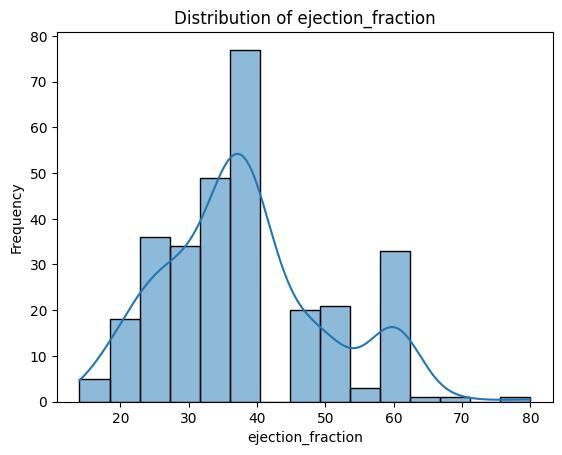

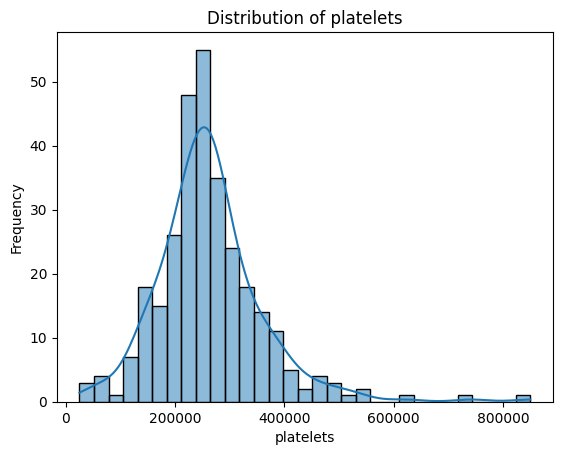

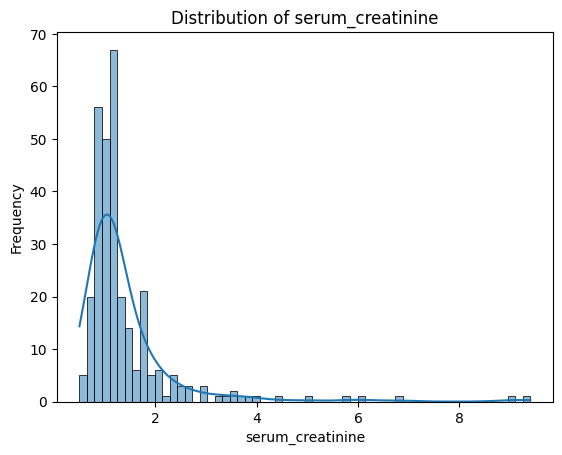

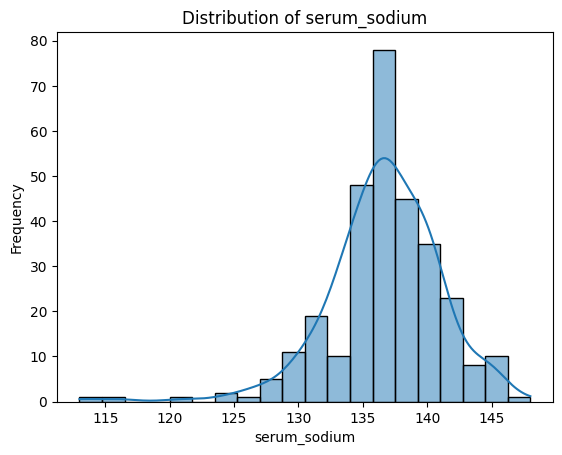

In [ ]:
# Select features
features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

# Plot distributions
for feature in features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

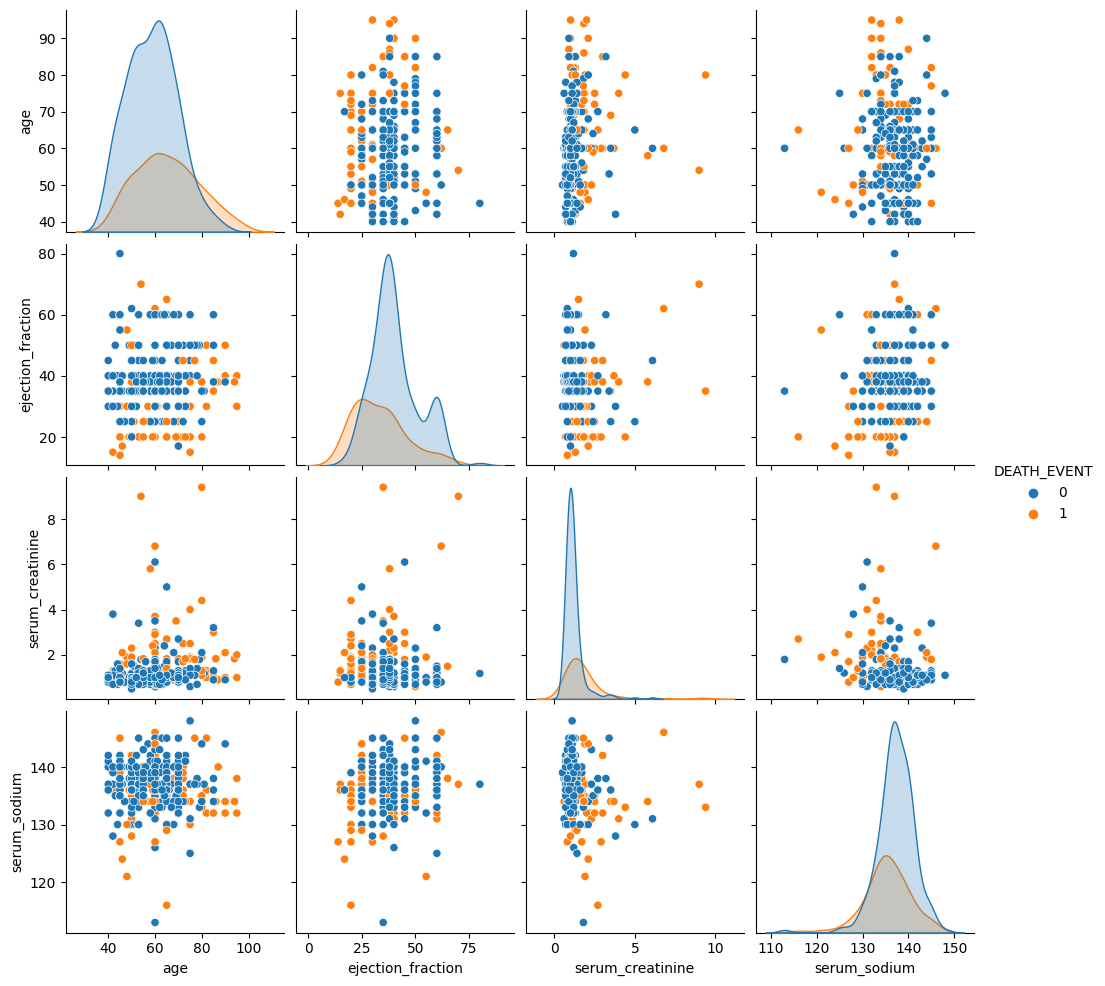

In [ ]:
# Select a few features for the pair plot
selected_features = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'DEATH_EVENT']

# Create a pair plot
sns.pairplot(df[selected_features], hue='DEATH_EVENT')
plt.show()


In [ ]:
# Standardizing the data
features_to_scale = ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
scaler = StandardScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [ ]:
# Creating variable for IQR
Q1 = df[features_to_scale].quantile(0.25)
Q3 = df[features_to_scale].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
df = df[~((df[features_to_scale] < (Q1 - 1.5 * IQR)) |(df[features_to_scale] > (Q3 + 1.5 * IQR))).any(axis=1)]

**Applying Machine Learning Models**

In [ ]:
# 'DEATH_EVENT' is your target variable
X = df.drop('DEATH_EVENT', axis=1)  # features
y = df['DEATH_EVENT']               # target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=10000)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')

Logistic Regression Accuracy: 0.76


In [ ]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

Decision Tree Accuracy: 0.78


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

Random Forest Accuracy: 0.87


In [ ]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

XGBoost Accuracy: 0.85


In [ ]:
# Cross validation
scores = cross_val_score(lr_model, X, y, cv=5)
print("Average cross-validation score:", scores.mean())

Average cross-validation score: 0.7635220125786163


**Machine Learning Interpretability**

First we'll use eli5 for Logistic Regression and Decision Tree

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=edaf4811a17aec94536a4bad08122432a1e02d071a39fd2b63523b2b0b2c5413
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5

# Display the weights of the Logistic Regression model
eli5.show_weights(lr_model, feature_names = X_train.columns.tolist())

Weight?,Feature
+0.001,creatinine_phosphokinase
+0.000,age
+0.000,serum_creatinine
+0.000,anaemia
+0.000,platelets
+0.000,high_blood_pressure
-0.000,smoking
-0.000,diabetes
-0.000,sex
-0.000,<BIAS>


In [ ]:
# Display the feature importance of the Decision Tree model
eli5.show_weights(dt_model, feature_names = X_train.columns.tolist())

Weight,Feature
0.5504,time
0.0999,serum_creatinine
0.0995,creatinine_phosphokinase
0.0981,ejection_fraction
0.0456,platelets
0.0331,serum_sodium
0.0248,age
0.0176,smoking
0.0155,sex
0.0155,high_blood_pressure


Using lime for Random Forest

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1887bd9f66123bbd5c6e8f1d282f39f6a9bba09dd31c7e85af14484dd1301480
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME explainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Not Fail', 'Fail'], discretize_continuous=True)

# Explain a prediction
i = 1 # Index of the instance you want to explain
exp = explainer.explain_instance(X_test.values[i], rf_model.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Using SHAP for XGBoost

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.8 MB/s eta 0:00:00


In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

[03:48:51] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


**Predict Observations**

In [ ]:
# Select two observations from the test set
test_observations = X_test.iloc[:2]

In [ ]:
# Predict probabilities using each model
proba_lr = lr_model.predict_proba(test_observations)
proba_dt = dt_model.predict_proba(test_observations)
proba_rf = rf_model.predict_proba(test_observations)
proba_xgb = xgb_model.predict_proba(test_observations)

# Print the predicted probabilities
print("Predicted Probabilities for Test Observations:")
print("Logistic Regression:", proba_lr)
print("Decision Tree:", proba_dt)
print("Random Forest:", proba_rf)
print("XGBoost:", proba_xgb)

Predicted Probabilities for Test Observations:
Logistic Regression: [[0.90234177 0.09765823]
 [0.6840985  0.3159015 ]]
Decision Tree: [[1. 0.]
 [1. 0.]]
Random Forest: [[0.9  0.1 ]
 [0.86 0.14]]
XGBoost: [[0.93420243 0.06579758]
 [0.7882218  0.21177822]]


In [ ]:
# Print the accuracy of each model
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

Logistic Regression Accuracy: 0.76
Decision Tree Accuracy: 0.78
Random Forest Accuracy: 0.87
XGBoost Accuracy: 0.85
